In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_csv('/content/lending_club_loan_dataset.csv')
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [ ]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [ ]:
data.describe(include=[np.object])

<ipython-input-9-c07674af406a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [ ]:
data.isnull()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


In [ ]:
data.dtypes.sort_values(ascending=True)

id                         int64
annual_inc                 int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [ ]:
data.shape

(20000, 15)

,absolute,percent
0,16000,80.0
1,4000,20.0


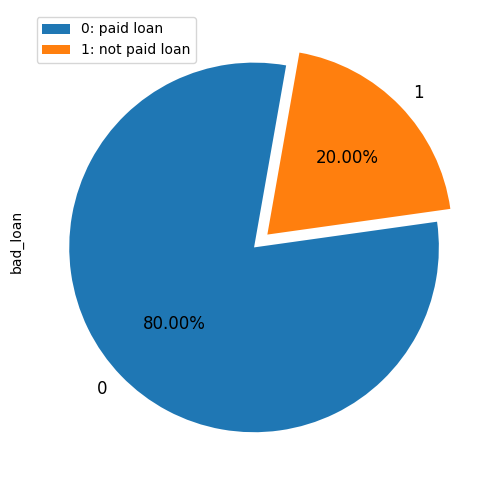

In [ ]:
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

#pie-chart

data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

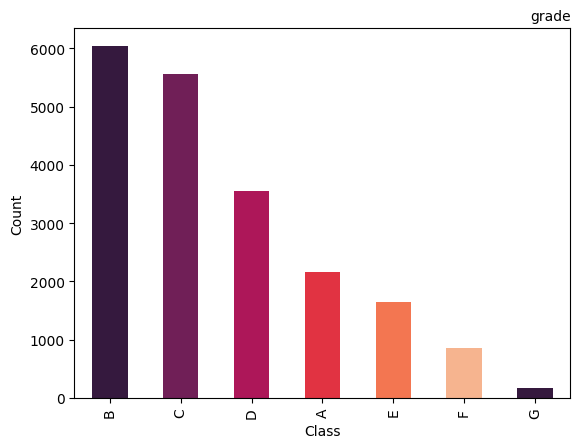

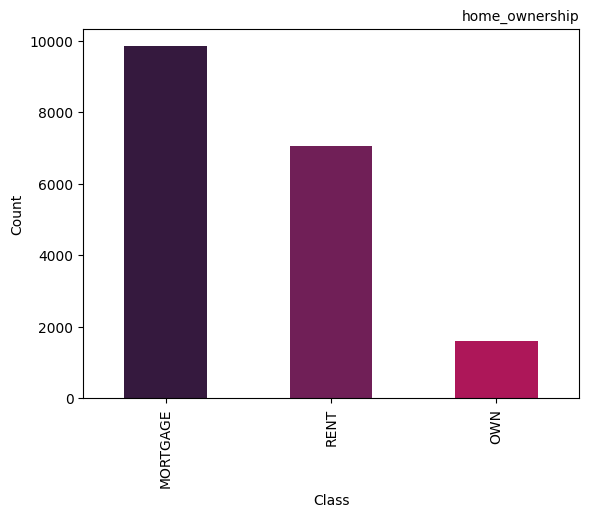

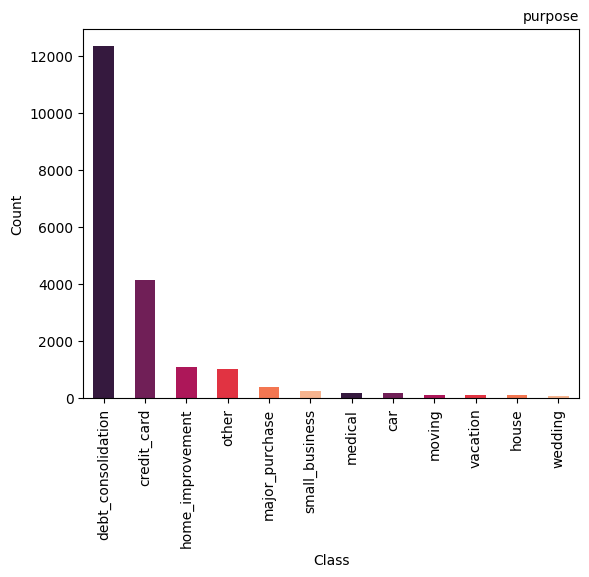

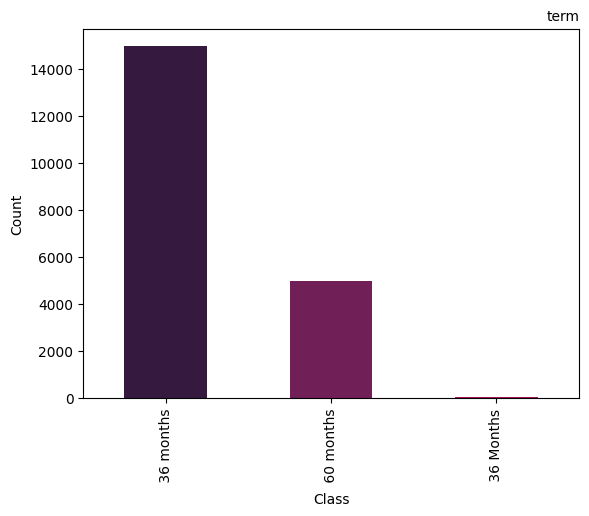

In [ ]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))

    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [ ]:
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

home_ownership,MORTGAGE,OWN,RENT
grade,,,
A,10125413622,1317629640,4051026441
B,23885885410,3462708590,14760476369
C,20610251432,3556938433,15150732416
D,11302570597,2341863113,11151017359
E,5710749816,1018416369,4929639589
F,2609177317,666981482,2724192127
G,536342691,109804609,529908890


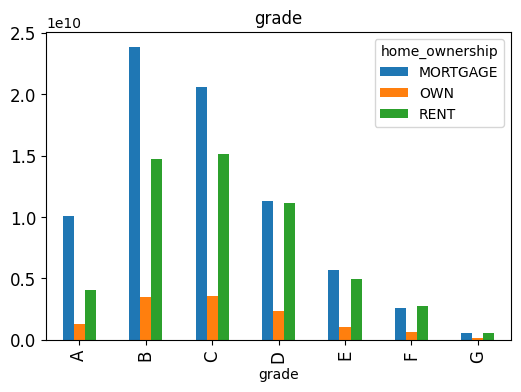

In [ ]:
pivot_sum("home_ownership","grade","id")

bad_loan,0,1
home_ownership,,
MORTGAGE,62024618628,12755772257
OWN,10069692998,2404649238
RENT,40735387375,12561605816


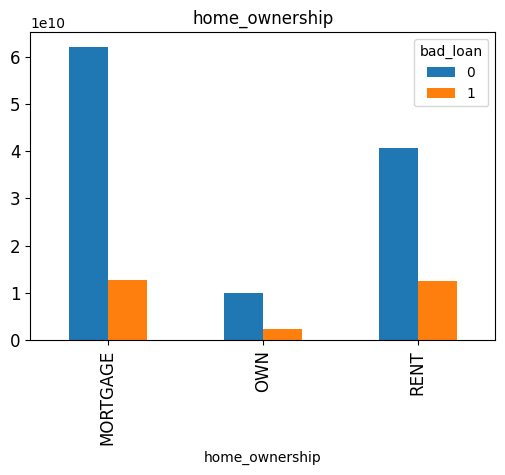

In [ ]:
pivot_sum("bad_loan", "home_ownership", "id")


In [ ]:
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});

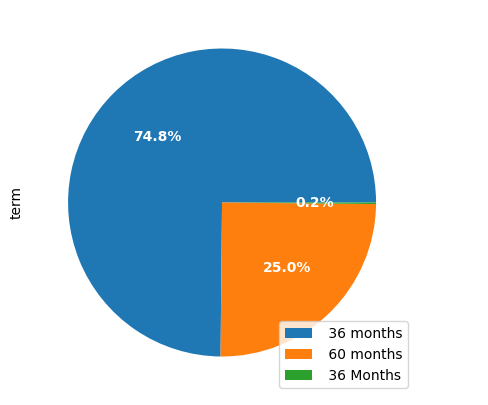

In [ ]:
pie("term")


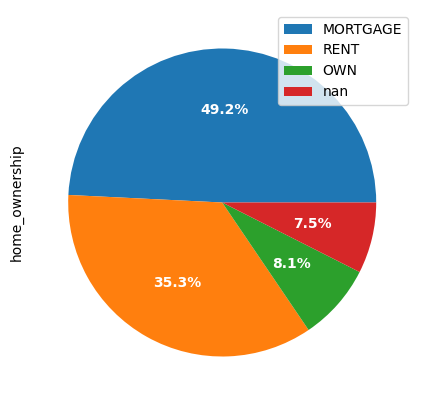

In [ ]:
pie("home_ownership")


In [ ]:
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]

    a = np.array(short_0)
    b = np.array(short_1)

    np.warnings.filterwarnings('ignore')

    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

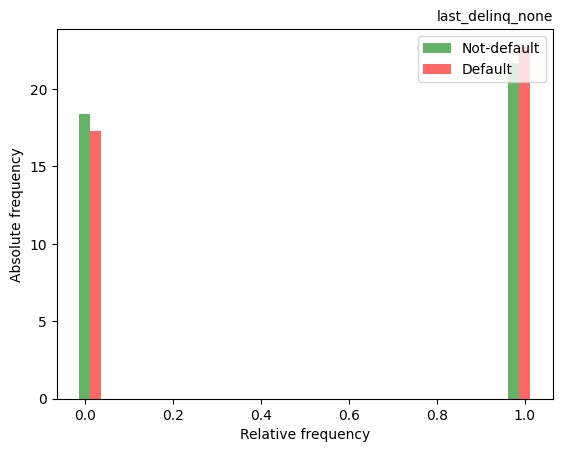

In [ ]:
target("last_delinq_none")


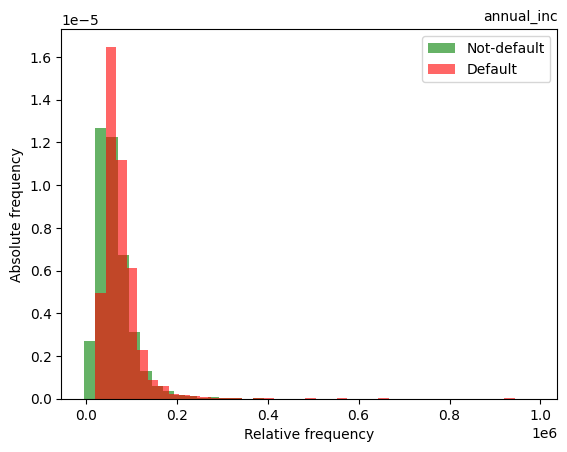

In [ ]:
target("annual_inc")


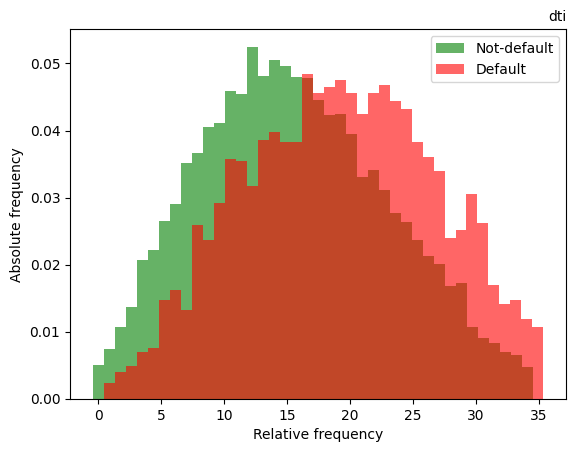

In [ ]:
target("dti")

In [ ]:
# Separate the features and target variable
X = data.drop(['id', 'bad_loan'], axis=1)
y = data['bad_loan']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
# One-hot encode categorical features
categorical_features = ['grade', 'home_ownership', 'purpose', 'term']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[:, [X.columns.get_loc(col) for col in categorical_features]])
X_test_encoded = encoder.transform(X_test[:, [X.columns.get_loc(col) for col in categorical_features]])

In [ ]:
# Concatenate encoded features with numerical features
X_train_encoded = np.concatenate([X_train_encoded, X_train[:, [X.columns.get_loc(col) for col in X.columns if col not in categorical_features]]], axis=1)
X_test_encoded = np.concatenate([X_test_encoded, X_test[:, [X.columns.get_loc(col) for col in X.columns if col not in categorical_features]]], axis=1)

In [ ]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test_encoded)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.80225


In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({
    'grade': ['A'],
    'annual_inc': [100000],
    'short_emp': [1],
    'emp_length_num': [1],
    'home_ownership': ['RENT'],
    'dti': [26.27],
    'purpose': ['credit_card'],
    'term': [' 36 months'],
    'last_delinq_none': [1],
    'last_major_derog_none': [0],
    'revol_util': [9.83],
    'total_rec_late_fee': [0],
    'od_ratio': [0.160624077]
})

In [ ]:
new_data_encoded = encoder.transform(new_data.values[:, [X.columns.get_loc(col) for col in categorical_features]])
new_data_encoded = np.concatenate([new_data_encoded, new_data.values[:, [X.columns.get_loc(col) for col in X.columns if col not in categorical_features]]], axis=1)

In [ ]:

# Predict the label for the new data
new_prediction = model.predict(new_data_encoded)
print("New Data Prediction:", new_prediction)
print("\n ---------------------------------------------\n")
if(new_prediction==0):
  print("The borrower will not be listed as defaulter")
else:
    print("The borrower will be listed as defaulter")
print("\n ---------------------------------------------\n")


New Data Prediction: [0]

 ---------------------------------------------

The borrower will not be listed as defaulter

 ---------------------------------------------

